In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator


In [5]:

fsamp  = 9100
fshalf = fsamp/2
fsmin  = fshalf*0.75
startf = 100  # frekvensen du begynnte målingen på

file = "../Data/working_longer.csv"
fullFilter = pd.read_csv(file, sep=',', skiprows=25, encoding='ISO-8859-1')
f  = np.array(fullFilter.iloc[:,0])
c1 = np.array(fullFilter.iloc[:,1])
c2 = np.array(fullFilter.iloc[:,2])

passX = [startf, fsmin, fsmin, startf]
passY = [-3, -3, 3, 3]

stopX = [fshalf, f[-1], f[-1], fshalf]
stopY = [-100, -100, -10, -10]

stageNames = ["working_stage_1", "working_stage_2"]
stages = [pd.read_csv("../Data/" + file + ".csv", sep=',',  skiprows=25, encoding='ISO-8859-1') for file in stageNames]
fs  = [np.array(i.iloc[:,0]) for i in stages]
c1s = [np.array(i.iloc[:,1]) for i in stages]
c2s = [np.array(i.iloc[:,2]) for i in stages]

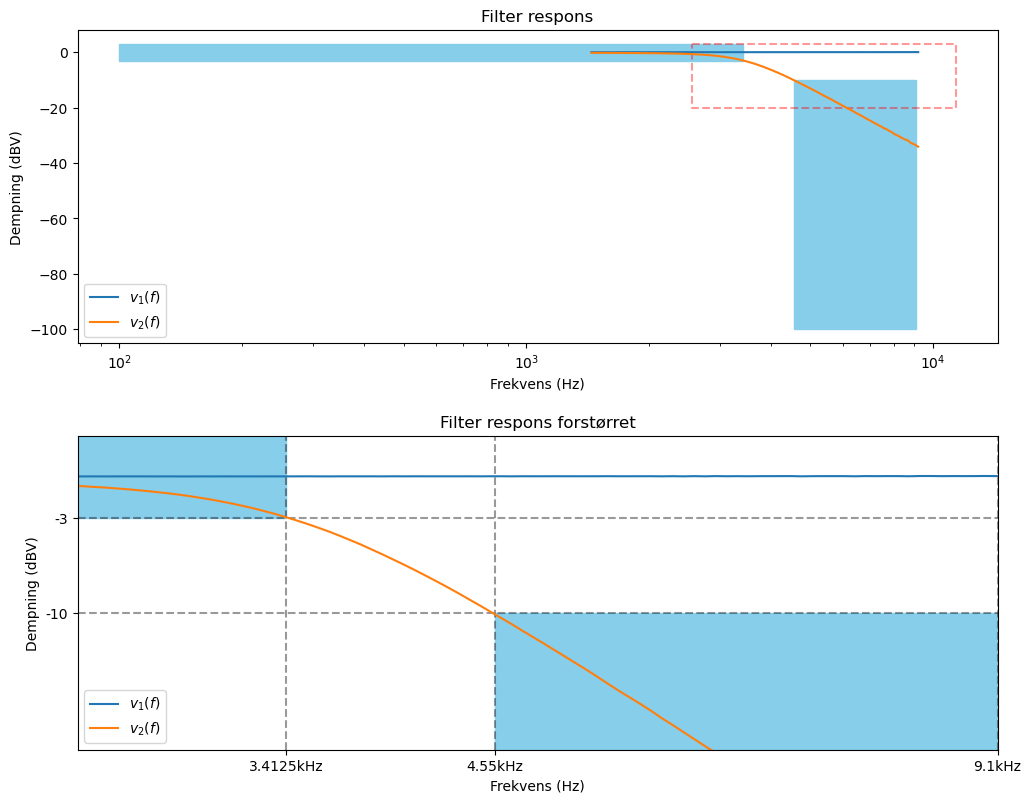

In [9]:
"""  --- plot whole filter  ---  """
plt.subplot(2,1,1)
plt.xscale("log")
plt.fill(passX, passY, color='skyblue')  
plt.fill(stopX, stopY, color='skyblue')  
plt.plot([fsmin*0.75, fsamp*1.25, fsamp*1.25, fsmin*0.75, fsmin*0.75], [3, 3, -20, -20, 3], color = "red", linestyle = "dashed", alpha = 0.4)
plt.plot(f, c1, label="$v_1(f)$")
plt.plot(f, c2, label="$v_2(f)$")

plt.xlabel("Frekvens (Hz)")
plt.ylabel("Dempning (dBV)")
plt.title("Filter respons")
plt.legend()

"""  ---  plot whole filter zoomed in  ---  """
plt.subplot(2,1,2)
plt.xscale("log")
plt.fill(passX, passY, color='skyblue')  
plt.fill(stopX, stopY, color='skyblue')  

# dshed lines
plt.plot([fsmin*0.75, fsamp*1.25], [-3,-3], color = "black", linestyle = "dashed", alpha = 0.4)
plt.plot([fsmin*0.75, fsamp*1.25], [-10,-10], color = "black", linestyle = "dashed", alpha = 0.4)
plt.plot([fsamp, fsamp], [-20,3], color = "black", linestyle = "dashed", alpha = 0.4)
plt.plot([fshalf, fshalf], [-20,3], color = "black", linestyle = "dashed", alpha = 0.4)
plt.plot([fsmin, fsmin], [-20,3], color = "black", linestyle = "dashed", alpha = 0.4)


plt.plot(f, c1, label="$v_1(f)$")
plt.plot(f, c2, label="$v_2(f)$")
plt.xlim(fsmin*0.75, fsamp)
plt.ylim(-20, 3)
plt.xticks([fsamp, fshalf, 0.75*fshalf], [f"{fsamp/1000}kHz", f"{fshalf/1000}kHz", f"{0.75*fshalf/1000}kHz"])
#plt.yticks(np.arange(0, -20, -3), np.arange(0, -20, -3))
plt.yticks([-3, -10],["-3", "-10"])
#plt.xticks([fsamp, fshalf, fsmin],["fs", "fs/2", "fs/2 * 0.75"])
plt.gca().xaxis.set_major_locator(FixedLocator([fsamp, fshalf, fsmin]))
plt.gca().xaxis.set_minor_locator(FixedLocator([]))

plt.xlabel("Frekvens (Hz)")
plt.ylabel("Dempning (dBV)")
plt.title("Filter respons forstørret")
plt.legend()

file = "../Data/working.csv"
fullFilter = pd.read_csv(file, sep=',', skiprows=25, encoding='ISO-8859-1')
f  = np.array(fullFilter.iloc[:,0])
c1 = np.array(fullFilter.iloc[:,1])
c2 = np.array(fullFilter.iloc[:,2])

# """  ------  plot stages  -------  """
# plt.subplot(3,1,3)
# plt.xscale("log")
# plt.plot(fs[0], c1s[0], label="Inngangssignal, $v_1(f)$")
# for i in range(0,2):
#     plt.plot(fs[i], c2s[i], label = f"Filter Stage {i+1}")
# plt.plot(f, c2, label = "Realisert filter, $v_2(f)$")

# plt.xlabel("Frekvens (Hz)")
# plt.ylabel("Dempning (dBV)")
# plt.title("Frekvensrespons til hvert filter stage")

# plt.legend()
plt.rcParams["figure.figsize"]=(10,5)            
plt.subplots_adjust(
    top=0.9,
    bottom=0.1,
    left=0.08,
    right=1,
    hspace=0.295,
    wspace=0.2
)
plt.savefig("../Notat/Bilder/filter_freq_plot.png", dpi=300)
plt.show()